<a href="https://colab.research.google.com/github/DiegoHartwig/-projeto-ocr-scanner-documentos/blob/main/projeto_scanner_documentos_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto OCR - Scanner de documentos



Importando as bibliotecas

In [1]:
import numpy as np
import cv2
import imutils
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

função para exibir a imagem

In [39]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(20, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

Processamento da imagem para transformação -
Carregando a imagem

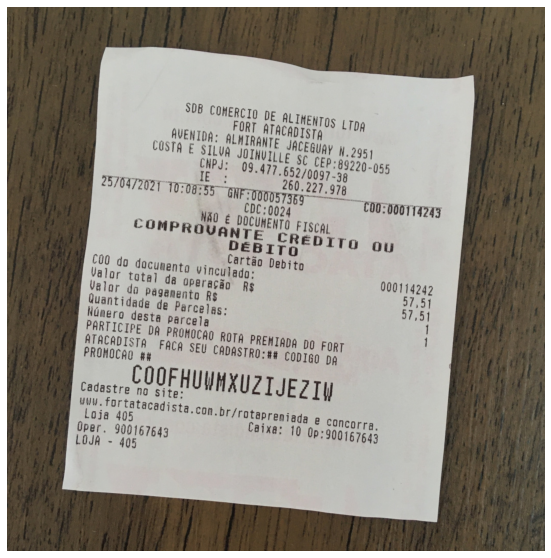

1061 1049


In [40]:
img = cv2.imread('imagens/documento.jpg')
original = img.copy()
mostrar(img)
(H, W) = img.shape[:2]
print(H, W)

Convertendo a imagem para escala de cinza - grayscale

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar(gray)

Aplicando desfoque - gaussian blur

In [ ]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
mostrar(blur)

Detectando as bordas - canny edge

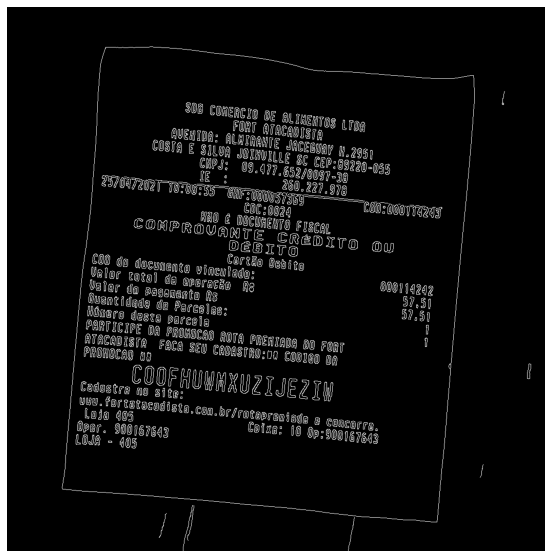

In [38]:
edged = cv2.Canny(blur, 60, 160)
mostrar(edged)

Detectando os contornos da imagem

In [8]:
def encontrar_contornos(img):
  contornos = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  contornos = imutils.grab_contours(contornos)
  contornos = sorted(contornos, key = cv2.contourArea, reverse = True)[:6]
  return contornos

In [11]:
contornos = encontrar_contornos(edged.copy())

Localizando o maior contorno
* Utilizando algoritmo: Ramer–Douglas–Peucker algorithm

In [18]:
for c in contornos:
  perimetro = cv2.arcLength(c, True)
  aproximacao = cv2.approxPolyDP(c, 0.02 * perimetro, True)

  if(len(aproximacao) == 4):
    maiorContorno = aproximacao
    break


In [ ]:
maiorContorno

In [ ]:
cv2.drawContours(img, maiorContorno, -1, (120, 255, 0), 28)
cv2.drawContours(img, [maior], -1, (120, 255, 0), 2)
mostrar(img)

Após a identificação das 4 coordenadas x y que correspondem aos cantos do retângulo localizado na imagem, é necessário ordenar esses pontos de tal modo que fiquem em uma ordem padrão e que assim seja possível aplicar a transformação de perspectiva. É importante que essa ordem seja consistente em todo o sistema, pois caso haja mudanças na ordem dos pontos do retângulo, a transformação não terá o resultado esperado. A ordem adotada para a organização dos pontos é: topo esquerdo (te), topo direito (td), baixo direito (bd) e baixo esquerdo (be).

In [26]:
def ordenar_pontos(pontos):
  pontos = pontos.reshape((4, 2))
  pontos_novos = np.zeros((4, 1, 2), dtype=np.int32)

  add = pontos.sum(1)
  pontos_novos[0] = pontos[np.argmin(add)]
  pontos_novos[2] = pontos[np.argmax(add)]

  dif = np.diff(pontos, axis = 1)
  pontos_novos[1] = pontos[np.argmin(dif)]
  pontos_novos[3] = pontos[np.argmax(dif)]

  return pontos_novos

In [27]:
pontos_maior = ordenar_pontos(maior)
print(pontos_maior)

[[[ 192   78]]

 [[ 909  133]]

 [[ 838 1004]]

 [[ 108  940]]]


Obtendo a matriz de transformação

In [33]:
pontosOriginais = np.float32(pontos_maior)

In [31]:
print(H, W)

1061 1049


In [30]:
pontos2 = np.float32([[0,0],[W, 0], [W, H], [0, H]])

In [34]:
matriz = cv2.getPerspectiveTransform(pontosOriginais, pontos2)
matriz

array([[ 1.47103022e+00,  1.43348652e-01, -2.93618997e+02],
       [-9.58731834e-02,  1.24983768e+00, -7.90796880e+01],
       [ 1.08773828e-05,  2.32288006e-05,  1.00000000e+00]])

## Transformação de perspectiva da imagem. 
* Nesse momento a imagem que antes estava inclinada agora está totalmente alinhada na vertical para facilitar a OCR





In [36]:
transform = cv2.warpPerspective(original, matriz, (W, H))


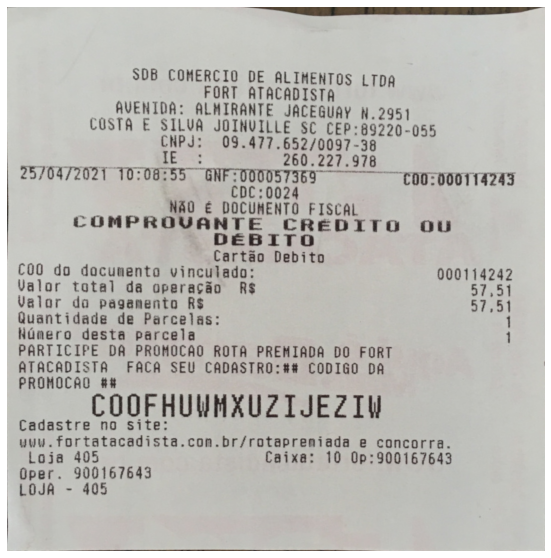

In [37]:
mostrar(transform)